This is the version that can load weights previously trained with 40k X-ring scattering images (128 x 128) at ALS by on a Linux machine. Loading the weights on Mac may show abnormal results.

In [1]:
from ddim import DiffusionModel

import matplotlib.pyplot as plt
import tensorflow as tf
#import tensorflow_datasets as tfds

from tensorflow import keras
from keras import layers

import numpy as np

In [2]:
# need load new dataset because the model need the mean and var information
batch_size = 1
data_dir = './data/dataset'
train_dataset = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                        labels=None, #if label='inferred', data_dir should be structured
                                                        color_mode='rgb', #'grayscale',
                                                        batch_size=batch_size,
                                                        image_size=(128, 128),
                                                        shuffle=True,
                                                        seed=1,
                                                    #  validation_split=0.2,
                                                    #  subset='both',
                                                        interpolation='lanczos5')    
    
normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x: (normalization_layer(x))).prefetch(buffer_size=32) 

Found 430 files belonging to 1 classes.


2024-02-26 21:39:55.164207: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-02-26 21:39:55.164396: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-02-26 21:39:55.164407: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-02-26 21:39:55.164660: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-26 21:39:55.165685: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
model = DiffusionModel(128, [32, 64, 96, 128], 2)

# to-do: generate new images with full resolutions (this would probably improve with more data for the training).  
# calculate mean and variance of training dataset for normalization
model.normalizer.adapt(train_dataset)

# checkpoint training for 2000 epochs 
checkpoint_path = "checkpoints4/diffusion_model"

# load the best model (the best model is saved based on the kid_val in validation) and generate images
model.load_weights(checkpoint_path)

2024-02-26 21:40:22.047128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


scheduler_start_noise level 1.0


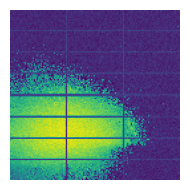

In [8]:
# This will genenerate new X-ray scattering images 
model.plot_gray_images()

### Add noise to a given image and denoise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


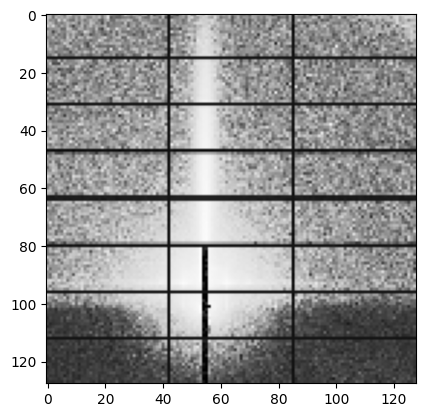

In [11]:
# plot the input image
input_image = next(iter(train_dataset))[0]
plt.imshow(input_image)

In [14]:
model.generate_images(num_images=1, n=0, input_images=input_image, noise_level=1.0, outname='output_image.png')

scheduler_start_noise level 1.0
